In [1]:
#Description: This program predicts the price of Coca-Cola (KO) stock for a specific day using ML algorithms

In [2]:
#import lib
import time
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('KO_Stock.csv')
#show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1,56.000000,56.980000,56.000000,56.700001,54.823887,17735400
1,2,56.849998,56.950001,56.610001,56.820000,54.939919,10234100
2,3,56.869999,57.150002,56.799999,56.939999,55.055946,14264300
3,4,56.849998,57.250000,56.570000,57.169998,55.278336,11968900
4,5,57.250000,57.639999,57.180000,57.610001,55.703781,12869600
...,...,...,...,...,...,...,...
250,251,50.040001,50.369999,49.759998,50.110001,50.110001,18538700
251,252,49.980000,50.360001,49.950001,50.160000,50.160000,18864100
252,253,50.160000,50.180000,49.220001,49.230000,49.230000,34262400
253,254,49.154999,49.189999,48.711399,48.724998,48.724998,5433374


In [4]:
#Show the last row of data
actual_price = df.tail(1)
#Show the data
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
254,255,49.16,49.18,48.53,48.7,48.7,24.358.000


In [5]:
#Get all of the data except the last row
df = df.head(len(df)-1)
#show
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1,56.000000,56.980000,56.000000,56.700001,54.823887,17735400
1,2,56.849998,56.950001,56.610001,56.820000,54.939919,10234100
2,3,56.869999,57.150002,56.799999,56.939999,55.055946,14264300
3,4,56.849998,57.250000,56.570000,57.169998,55.278336,11968900
4,5,57.250000,57.639999,57.180000,57.610001,55.703781,12869600
...,...,...,...,...,...,...,...
249,250,50.619999,50.860001,49.950001,50.200001,50.200001,19310600
250,251,50.040001,50.369999,49.759998,50.110001,50.110001,18538700
251,252,49.980000,50.360001,49.950001,50.160000,50.160000,18864100
252,253,50.160000,50.180000,49.220001,49.230000,49.230000,34262400


In [6]:
# Create empty list 
days = list()
adj_close_prices = list()

In [7]:
#Get only the date and the adjusted close prices
df_days = df.loc[:,'Date']
#show
df_days

df_adj_close = df.loc[:,'Adj Close']
#show
df_adj_close

0      54.823887
1      54.939919
2      55.055946
3      55.278336
4      55.703781
         ...    
249    50.200001
250    50.110001
251    50.160000
252    49.230000
253    48.724998
Name: Adj Close, Length: 254, dtype: float64

In [8]:
# Create the independent data set (dates)
for day in df_days:
    days.append([int(day)])
# Create the dependent data set (adj close prices)
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))

In [9]:
#Show the days
days

[[1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [53],
 [54],
 [55],
 [56],
 [57],
 [58],
 [59],
 [60],
 [61],
 [62],
 [63],
 [64],
 [65],
 [66],
 [67],
 [68],
 [69],
 [70],
 [71],
 [72],
 [73],
 [74],
 [75],
 [76],
 [77],
 [78],
 [79],
 [80],
 [81],
 [82],
 [83],
 [84],
 [85],
 [86],
 [87],
 [88],
 [89],
 [90],
 [91],
 [92],
 [93],
 [94],
 [95],
 [96],
 [97],
 [98],
 [99],
 [100],
 [101],
 [102],
 [103],
 [104],
 [105],
 [106],
 [107],
 [108],
 [109],
 [110],
 [111],
 [112],
 [113],
 [114],
 [115],
 [116],
 [117],
 [118],
 [119],
 [120],
 [121],
 [122],
 [123],
 [124],
 [125],
 [126],
 [127],
 [128],
 [129],
 [130],
 [131],
 [132],
 [133],
 [134],
 [135],
 [136],
 [137],
 [138],
 [13

In [10]:
#Show the adj close prices
adj_close_prices

[54.823887,
 54.939918999999996,
 55.055946,
 55.278335999999996,
 55.703781000000006,
 55.916504,
 55.771457999999996,
 55.578079,
 55.123631,
 55.123631,
 56.912415,
 56.46764,
 56.641681999999996,
 56.893078,
 56.902747999999995,
 57.03811999999999,
 57.231494999999995,
 57.772968000000006,
 57.618263,
 57.444218000000006,
 57.6376,
 57.966354,
 57.560249,
 57.792308999999996,
 57.743965,
 58.1404,
 56.70936999999999,
 55.906826,
 55.694111,
 53.11245699999999,
 51.720104,
 54.069697999999995,
 54.20506700000001,
 56.970428000000005,
 54.862564,
 53.431538,
 50.144034999999995,
 51.884476,
 50.482456,
 45.599552,
 47.277225,
 44.146214,
 46.01897,
 43.746311,
 40.800629,
 37.357494,
 36.635704,
 38.479195000000004,
 40.586040000000004,
 43.200092,
 41.756512,
 43.892616,
 43.161076,
 41.083488,
 42.868454,
 42.751411,
 45.521522999999995,
 45.365456,
 46.643219,
 47.794182,
 45.775124,
 47.716152,
 46.438389,
 45.940940999999995,
 46.877319,
 45.38496,
 44.263268,
 44.55588499999999

In [11]:
#Create 3 models
lin_svr = SVR(kernel='linear', C = 10.0)


In [12]:
x = time.perf_counter()
lin_svr.fit(days,adj_close_prices)
print(time.perf_counter()-x)

1.3007011000000002


In [13]:

poly_svr = SVR(kernel='poly', C = 1000.0, degree=2)


In [14]:
x = time.perf_counter()
poly_svr.fit(days,adj_close_prices)
print(time.perf_counter()-x)

0.5008167000000001


In [15]:

rbf_svr = SVR(kernel='rbf', C = 10000.0, gamma=0.5)


In [16]:
x = time.perf_counter()
rbf_svr.fit(days,adj_close_prices)
print(time.perf_counter()-x)

0.010121799999999848


In [17]:
#plt.figure(figsize=(16,8))

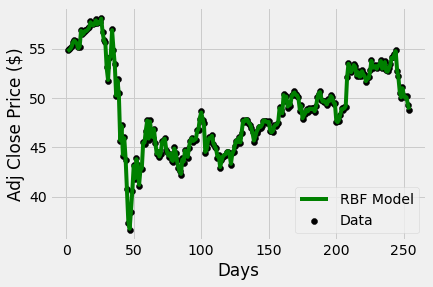

In [18]:
plt.scatter(days, adj_close_prices,color="black", label="Data")
plt.plot(days, rbf_svr.predict(days), color = "green", label = "RBF Model")
#plt.plot(days, poly_svr.predict(days), color = "orange", label = "Polynomial Model")
#plt.plot(days, lin_svr.predict(days), color = "blue", label = "Linear Model")
plt.xlabel('Days')
plt.ylabel('Adj Close Price ($)')
plt.legend()
plt.show()

In [19]:
#Show the predicted price for a given day
day_ = [[255]]
print(actual_price)
print('RBF',rbf_svr.predict(day_))
print('LIN',lin_svr.predict(day_))
print('poly',poly_svr.predict(day_))

     Date   Open   High    Low  Close  Adj Close      Volume
254   255  49.16  49.18  48.53   48.7       48.7  24.358.000
RBF [48.84078018]
LIN [51.34819679]
poly [53.98608165]
